
--- First 5 Rows of the Dataset ---
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

--- Last 5 Rows of the Dataset ---
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

--- Dataset Shape (Rows, Columns) ---
(200, 4)

--- Column Names ---
Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

--- Data Types and Non-Null Counts ---
<class '

C:\Users\youss\AppData\Local\Temp\ipykernel_19320\3985358783.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=dataset, palette='pastel')


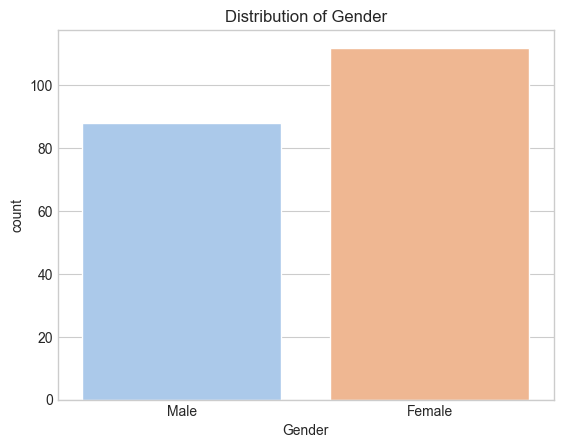


--- Distribution of Age ---


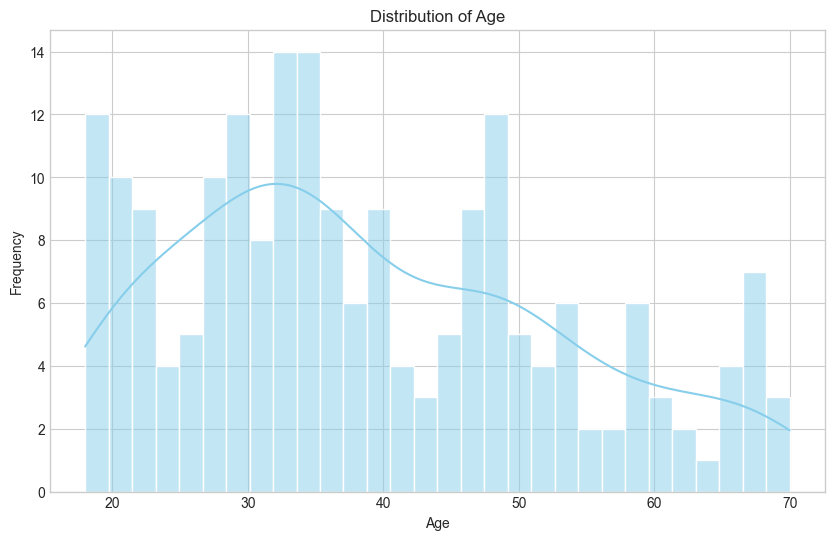


--- Correlation Matrix (Numerical Features) ---


NameError: name 'numerical_features' is not defined

In [1]:
import numpy as np
import pandas as pd
# from mpl_toolkits.axes_grid1.axes_size import AxesX # Not used in this initial exploration
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is great for statistical visualizations
from sklearn.preprocessing import StandardScaler
# Set a nice style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("whitegrid")

# --- 1. Load Dataset ---

dataset = pd.read_csv('Mall_Customers.csv') # read the CSV
dataset.drop('CustomerID', axis=1, inplace=True)

# --- 2. Explore its Structure and Understand its Features ---

print("\n--- First 5 Rows of the Dataset ---")
print(dataset.head())

print("\n--- Last 5 Rows of the Dataset ---")
print(dataset.tail())

print("\n--- Dataset Shape (Rows, Columns) ---")
print(dataset.shape)

print("\n--- Column Names ---")
print(dataset.columns)

print("\n--- Data Types and Non-Null Counts ---")
dataset.info()

# --- 3. Initial Analysis to Assess Data Quality and Preprocessing Needs ---

print("\n--- Descriptive Statistics (Numerical Features) ---")
print(dataset.describe())

print("\n--- Descriptive Statistics (Categorical Features) ---")
# For object/categorical columns, describe() gives count, unique, top (most frequent), and freq (frequency of top).
print(dataset.describe(include=['object', 'category']))

print("\n--- Checking for Missing Values ---")
missing_values = dataset.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"Total missing values: {missing_values.sum()}")

print("\n--- Checking for Duplicate Rows ---")
duplicate_rows = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    print("Consider dropping duplicate rows using: dataset.drop_duplicates(inplace=True)")

# --- Understanding Individual Features ---

# Gender: Categorical feature.
print("\n--- Value Counts for Gender ---")
print(dataset['Gender'].value_counts())
sns.countplot(x='Gender', data=dataset, palette='pastel')
plt.title('Distribution of Gender')
plt.show()

# Age: Numerical feature.
print("\n--- Distribution of Age ---")
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



print("\n--- Correlation Matrix (Numerical Features) ---")
correlation_matrix = dataset[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print(correlation_matrix)

In [ ]:

#Rename columns
dataset.rename(columns={
    'Annual Income (k$)': 'Annual_Income_k',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

# Identify Numerical Features for Scaling ---
numerical_features = ['Age', 'Annual_Income_k', 'Spending_Score']
print(f"\nNumerical features to be scaled: {numerical_features}")

# Separate numerical data for scaling
data_to_scale = dataset[numerical_features]

# Keep categorical data separate (if any)
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical features (not scaled): {categorical_features}")
if categorical_features:
    categorical_data = dataset[categorical_features]
else:
    categorical_data = None # No categorical columns left besides the ones being scaled


# --- 3. Apply StandardScaler ---
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the numerical data (calculates mean and std dev)
# and transform the data (applies the scaling formula)
# fit_transform combines both steps
scaled_data_array = scaler.fit_transform(data_to_scale)

# The output 'scaled_data_array' is a NumPy array.
# It's often convenient to convert it back to a DataFrame with original column names.
scaled_df = pd.DataFrame(scaled_data_array, columns=numerical_features, index=dataset.index) # Use original index

print("\n--- Scaled Numerical Data (First 5 Rows) ---")
print(scaled_df.head())

print("\nDescriptive Statistics (After Scaling):")
# Mean should be close to 0, std dev close to 1
print(scaled_df.describe())

# --- 4. Combine Scaled Numerical Data with Categorical Data (Optional but common) ---
# Create the final preprocessed DataFrame
if categorical_data is not None:
    preprocessed_dataset = pd.concat([categorical_data, scaled_df], axis=1)
else:
    preprocessed_dataset = scaled_df # If no categorical columns were present

print("\n--- Final Preprocessed Dataset (with Scaled Features) ---")
print(preprocessed_dataset.head())
